PYBER

In [1]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city_csv = "city_data.csv"
ride_csv = "ride_data.csv"

In [3]:
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [4]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
ride_city_df = pd.merge(ride_df,city_df,on="city")
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [7]:
urban = ride_city_df[ride_city_df["type"]== "Urban"]
suburban = ride_city_df[ride_city_df["type"]== "Suburban"]
rural = ride_city_df[ride_city_df["type"]== "Rural"]


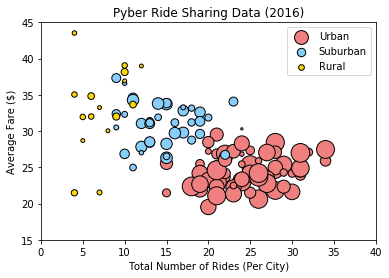

In [8]:
urban_ride_count = urban.groupby("city").count()["ride_id"]
urban_average_fare = urban.groupby("city").mean()["fare"]
urban_driver_count = urban.groupby("city").mean()["driver_count"]

suburban_ride_count = suburban.groupby("city").count()["ride_id"]
suburban_average_fare = suburban.groupby("city").mean()["fare"]
suburban_driver_count = suburban.groupby("city").mean()["driver_count"]

rural_ride_count = rural.groupby("city").count()["ride_id"]
rural_average_fare = rural.groupby("city").mean()["fare"]
rural_driver_count = rural.groupby("city").mean()["driver_count"]


plt.scatter(urban_ride_count,urban_average_fare,s=5*urban_driver_count,
            marker = "o",facecolors="lightcoral",edgecolors ="black",label ="Urban")
plt.scatter(suburban_ride_count,suburban_average_fare,s=5*suburban_driver_count,
            marker = "o",facecolors="lightskyblue",edgecolors ="black",label ="Suburban")
plt.scatter(rural_ride_count,rural_average_fare,s=5*rural_driver_count,
            marker = "o",facecolors="gold",edgecolors ="black",label ="Rural")

plt.xlim(0,40)
plt.ylim (15,45)
plt.title ("Pyber Ride Sharing Data (2016)")
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")
plt.legend (loc = "upper right")

plt.show()

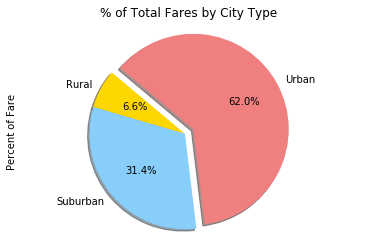

In [9]:
# % of Total Fares by City Type Pie Chart
#group by city type 
group_city_df = ride_city_df.groupby(['type'])

# % of Total Fares by City Type
total_fare = ride_city_df["fare"].sum()
percent_fare = (group_city_df ["fare"].sum()/total_fare)

#create new dataframe by city type
fares_df = pd.DataFrame({"Percent of Fare":percent_fare})

type_list = fares_df.keys()
fares_pie = fares_df.plot(kind="pie",y=type_list,
                          title="% of Total Fares by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
fares_pie.axis('equal')
plt.show()

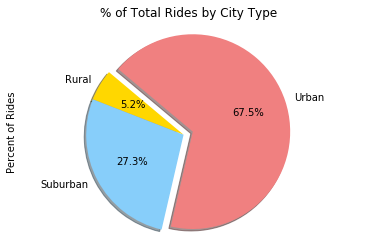

In [10]:
# % of Total Rides by City Type Pie Chart

# % of Total Rides by City Type
total_rides = ride_city_df["ride_id"].count()
percent_rides = group_city_df ["ride_id"].count()/total_rides

#create new dataframe by city type
rides_df = pd.DataFrame({"Percent of Rides":percent_rides})

type_list = rides_df.keys()
rides_pie = rides_df.plot(kind="pie",y=type_list,
                          title="% of Total Rides by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
rides_pie.axis('equal')
plt.show()

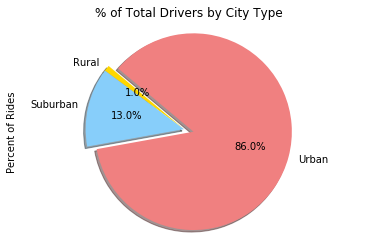

In [11]:
# % of Total Drivers by City Type Pie Chart

# % of Total Drivers by City Type
total_drivers = city_df["driver_count"].sum()
percent_drivers = group_city_df ["driver_count"].sum()/total_drivers

#create new dataframe by city type
drivers_df = pd.DataFrame({"Percent of Rides":percent_drivers})

type_list = drivers_df.keys()
drivers_pie = drivers_df.plot(kind="pie",y=type_list,
                          title="% of Total Drivers by City Type",
                         legend=False,colors=["gold","lightskyblue","lightcoral"],
                          shadow =True, startangle=140,autopct="%1.1f%%",
                         explode=[0,0,.1])
drivers_pie.axis('equal')
plt.show()

# Observations
1. Rural areas have higher fares than suburban and urban areas even though rural has lower number of rides
2. Urban areas dominate the number of drivers, riders and fares.
3. Even though rural and suburban areas have 1% and 13% of drivers, respectively, they have about 6% to 30% of fares and rides. They drivers in rural and suburban areas have a higher rate of fares and rides compared to their urban counterparts.